# Matrices part 2

In [19]:
import numpy as np
from matplotlib import pyplot as plt
import scipy as sp
from sympy import *

## Matrix Norm

There are two families of matrix norm:
- element-wise norm: reflect the magnitude of the elements in the matrix
- induced: measure of how much a matrix transform (strech or shrinks) a vector

Frobendius norm is an element-wise norm

In [20]:

M = np.array([[4,5,6], [0,1,4], [9,9,9]])
M2 = np.array([[0,0,0],[0,8,0],[1,2,6]])

# Frobenius norm of a matrix
print(np.linalg.norm(M))
print(np.linalg.norm(M, ord='fro'))

# trace of a matrix (sum of diagonal elements)
t = np.trace(M)
t2 = np.trace(M2)
print(t)
print(t2)

18.35755975068582
18.35755975068582
14
14


## Properties of diagonal matrices

- premultiplying by a diagonal matrix scales the rows of the right matrix by the corresponding diagonal matrix
- postmultiplying by a diagonal matrix scales the columns of the left matrix by the corresponding diagonal matrix

In [21]:
M = np.ones((4,4))
M2 = np.array([[1,0,0,0],[0,4,0,0], [0,0,9,0], [0,0,0,16]])
M3 = np.array([[1,0,0,0], [0,2,0,0], [0,0,3,0], [0,0,0,4]])
M3 = np.sqrt(M2)

print(M@M2)
print(M2@M)
print(M3@M@M3)

[[ 1.  4.  9. 16.]
 [ 1.  4.  9. 16.]
 [ 1.  4.  9. 16.]
 [ 1.  4.  9. 16.]]
[[ 1.  1.  1.  1.]
 [ 4.  4.  4.  4.]
 [ 9.  9.  9.  9.]
 [16. 16. 16. 16.]]
[[ 1.  2.  3.  4.]
 [ 2.  4.  6.  8.]
 [ 3.  6.  9. 12.]
 [ 4.  8. 12. 16.]]


## Column space, row space and null space of a matrix

<b>Column space</b>: exactly like linear weighted combination of vectors involves scalar multiplying and summing a set of vectors, an infinite number of scalars (all the real numbers) gives an infinite number of way of multiplying a matrix (which can be seen as a set of column vectors). The column space can be succintly summarized as the equation: Ax = b

<b>Row space</b>: it's like the column space but for rows. That means, that is egal to the column space of the transposed matrix. The row echelons form (not reduced) of a matrix is the set of linear independent vectors that form the basis of the row space

<b>Null space</b>: The null space can be summarized by the equation Ay = 0, where y != 0 



[[1 -1]]


C:\Users\marco\AppData\Local\Temp\ipykernel_36544\3033552240.py:37: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend(['row vectors', 'row space'], ['black', 'lightcoral'])


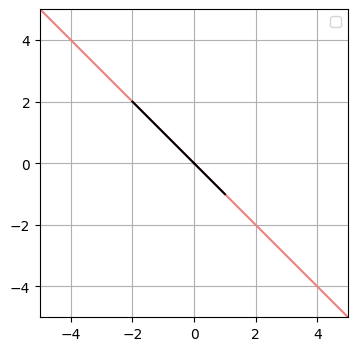

[[1 0]
 [0 1]]


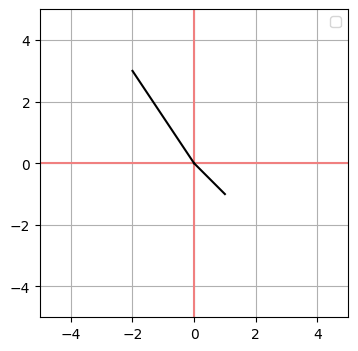

[[1 -2]]


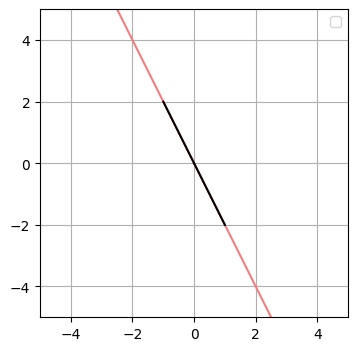

[[1 0]
 [0 1]]


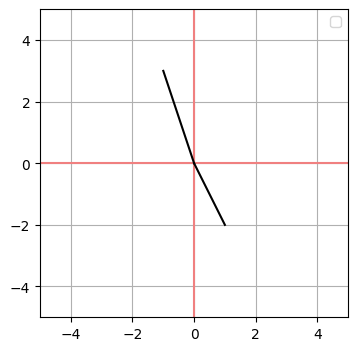

[[0.70710678]
 [0.70710678]]
[]


In [22]:
# A has a null space
A = np.array([[1,-1],[-2,2]])
# B doesn't have a null space
B = np.array([[1,-1],[-2,3]])

## find the row space basis
def rowSpaceBasis(a):
    m = Matrix(a.tolist())
    #use sympy to find row echelon form
    M_rref = np.array(m.rref()[0].tolist())
    #take away zeros row vectors
    row_space_basis = M_rref[~np.all(M_rref == 0, axis=1)]
    return row_space_basis


##------------- plot row vectors and row space -----------------

def plotRowSpace(m):
    fig, ax = plt.subplots(figsize=(4,4))
    limit = 5
    plt.xlim(-limit,limit)
    plt.ylim(-limit,limit)
    ax = plt.gca()
    ax.set_aspect('equal', adjustable='box')
    plt.grid()

    row_space_basis = rowSpaceBasis(m)

    for v in row_space_basis:
        plt.plot([0, limit*v[0]],[0,limit*v[1]],color='lightcoral')
        plt.plot([0, -limit*v[0]],[0,-limit*v[1]],color='lightcoral')

    for v in m:
        plt.plot([0,v[0]],[0, v[1]],color='black')

    
    plt.legend(['row vectors', 'row space'], ['black', 'lightcoral'])
    plt.show()


print(rowSpaceBasis(A))
plotRowSpace(A)


print(rowSpaceBasis(B))
plotRowSpace(B)

##-------------------- plot column space -----------------
print(rowSpaceBasis(A.T))
plotRowSpace(A.T)

print(rowSpaceBasis(B.T))
plotRowSpace(B.T)


## null space (scipy returns an unit vector, but all the scalared versions of this vector are the null space)
print(sp.linalg.null_space(A))
print(sp.linalg.null_space(B))



## Rank

Rank is a number associated with matrices and it is related to the dimensionalities of matrix subspaces, and has important implications for matrix operations, including inverting matrices and determining the number of solutions to a system of equations.

Rank is non-negative
Every matrix has only one, unique rank
The maximum possible rank of a matrix is the smaller of its row or column count
A matrix with its maximum possible rank is called full rank, otherwise it is called "singular" or "reduced-rank" or "rank-deficient"

### Rank of Added, Multiplied and Shifted 

One cannot know the exact rank fo a summed or product matrix based on knowing the ranks of the individual matrices. \
The individual matrices provide upper bounds for the rank of the summed or product matrix \
The rank of a summed matrix could be greater than the ranks of the individual matrices \
The rank of a multiplied matrix cannot be greater than the largest rank of the multiplying matrices. \
\
Shifted matrices have full rank

In [23]:
M = np.array([[1,1,-4], [2,-2,2]])

print(np.linalg.matrix_rank(M))

# ------- rank of special matrices -------------- 

#1
vector = np.array([1,2,3,4])
print(np.linalg.matrix_rank(vector))

#0
zero = np.zeros([4,5])
print(np.linalg.matrix_rank(zero))

#full rank
identity = np.eye(5)
print(np.linalg.matrix_rank(identity))

#full rank
diagonal = np.diag( np.random.randint(0,6,size=8) )
print(np.linalg.matrix_rank(diagonal))

# upper-triangular square
M2 = np.triu(np.random.randint(10,20,(3,3)))

# lower-triangular rectangular
M3 = np.tril(np.random.randint(8,16,(3,5)))


2
1
0
5
6


## Determining if a vector is in the column space of a matrix

The procedure is:
- 1: Augment the matrix with the vector
- 2: Compute the rank of the two matrices
- 3: Compare the two ranks


In [24]:
# take a random matrix and a column vector with the same number of rows

#A = np.random.randint(10,20,(3,3))
A = np.array([[1,1,1],[0,0,0],[1,1,1]])
V = np.random.randint(-10,20,(3,1))

print(A)
print(V)

# Augement the matrix with the vector
Aug = np.hstack((A,V))

print(Aug)

# compute and compare the two ranks
rankA = np.linalg.matrix_rank(A)
rankAug = np.linalg.matrix_rank(Aug)

print(rankA)
print(rankAug)

if rankA == rankAug:
    print('vector is in column space of matrix')
else:
    print('vector is not in the column space of the matrix')


## Linear independence of a vector set
M = np.random.randint(10,20,(300,3))

M2 = np.array([[1,2,3], [2,4,6], [3,6,9]])

number_of_columns = M.shape[1]
rank = np.linalg.matrix_rank(M)

number_of_columns_2 = M2.shape[1]
rank2 = np.linalg.matrix_rank(M2)

if number_of_columns == rank:
    print('the vector set is linearly independent')
else:
    print('the vector set is linearly dependent')

if number_of_columns_2 == rank2:
    print('the vector set is linearly independent')
else:
    print('the vector set is linearly dependent')

[[1 1 1]
 [0 0 0]
 [1 1 1]]
[[11]
 [-9]
 [13]]
[[ 1  1  1 11]
 [ 0  0  0 -9]
 [ 1  1  1 13]]
1
2
vector is not in the column space of the matrix
the vector set is linearly independent
the vector set is linearly dependent


## Determinant

The two main properties of the determinant are:
- it is defined only for square matrices
- it is zero for singular (reduced-rank) matrices

Computing the determinant for large matrices can be numerically instable 

The determinant is related to how much the matrix streches vectors during matrix-vector multiplication. A negative determinant means that one axis is rotated during the transformation

In [25]:
M = np.random.randint(10,20,(3,3))

det = np.linalg.det(M)
det2 = sp.linalg.det(M)

print(det)
print(det2)

# matrix with a linear dependent column:
reduced_M = np.array([[1,2,5], [2,4,23], [3,6,45]])

rank = np.linalg.matrix_rank(reduced_M)
print(rank)

# determinant is 0 for reduced ranked matrices
print(np.linalg.det(reduced_M))

606.0000000000003
605.9999999999999
2
0.0


## The characteristic polynomial

det(A - ʎI) = Δ

The characteristic polynomial transforms a square matrix, shifted by ʎ, into an equation that equals the determinant. \
Knowing the determinant allows you to solve for ʎ (unknown variables inside the matrix)

Combining matrix shifting with the determinant is called the <b>characteristic polynomial</b>

The solution to the characteristic polynomial set to Δ = 0 (null space)

In [35]:
M = Matrix([[1,3],[3,1]])
x = Symbol('x')
char_pol = M.charpoly(x)

print(char_pol)


PurePoly(x**2 - 2*x - 8, x, domain='ZZ')
